In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import cluster
from sklearn.cluster import KMeans
# import VisualizeHelper.VisualizeCluster as VisualizeCluster
score = pd.read_csv('DATA.csv')  
score.head()
print(score)
means = round(score['加總回饋'].groupby([score['卡名'],score['優惠分類名稱']]).mean(),2)
means = means.reset_index()   #將series轉回dataframe
df=means.set_index(['卡名','優惠分類名稱'])['加總回饋'].unstack()   #將行轉換成列
df.columns.name=None
df=df.reset_index()
# df=df.values   #將dataframe轉換成array
del df['卡名']
print(df)
outputpath='result.csv'
df.to_csv(outputpath,sep=',',index=False,header=True)

              卡名  加總回饋 優惠分類名稱
0     @GoGo悠遊御璽卡   1.0   影音娛樂
1     @GoGo悠遊御璽卡   3.5   影音娛樂
2     @GoGo悠遊御璽卡   1.0   影音娛樂
3     @GoGo悠遊御璽卡   3.5   影音娛樂
4     @GoGo悠遊御璽卡   5.0   影音娛樂
...          ...   ...    ...
3655   魔FUN悠遊御璽卡  50.0   影音娛樂
3656   魔FUN悠遊御璽卡   0.5   影音娛樂
3657   魔FUN悠遊御璽卡  50.0   影音娛樂
3658   魔FUN悠遊御璽卡  50.0   影音娛樂
3659   魔FUN悠遊御璽卡   0.5   影音娛樂

[3660 rows x 3 columns]
     外送平台   影音娛樂   網路購物  行動支付     超商
0     7.0   0.00   7.00  7.00   0.00
1     5.0   2.92   5.07  1.73   5.00
2     0.6   0.10   0.60  1.27   0.00
3     1.0   3.73   2.00  1.00  11.75
4    10.0   0.15  10.00  1.05  10.00
..    ...    ...    ...   ...    ...
117   0.0   0.00   0.00  0.00   0.00
118   0.0   0.00   0.00  0.00   0.00
119   1.2   1.20   1.20  1.20   1.20
120   8.0   3.00   6.96  5.35   8.00
121   1.3  33.50   1.19  1.42   1.30

[122 rows x 5 columns]


In [41]:
# read-in the excel spreadsheet using pandas 
df = pd.read_csv(r'result.csv')
print(df.head())

#create model
model = KMeans(n_clusters = 4).fit(df)
df['Cluster'] = model.labels_
print(df.sample(10))

   外送平台  影音娛樂   網路購物  行動支付     超商
0   7.0  0.00   7.00  7.00   0.00
1   5.0  2.92   5.07  1.73   5.00
2   0.6  0.10   0.60  1.27   0.00
3   1.0  3.73   2.00  1.00  11.75
4  10.0  0.15  10.00  1.05  10.00
     外送平台  影音娛樂  網路購物  行動支付    超商  Cluster
52    1.0  1.83  1.00  1.00  0.00        3
74    0.6  1.35  0.80  2.49  2.00        3
50    0.0  0.00  0.00  0.00  6.25        3
90    2.0  2.00  2.00  2.00  0.00        3
95    1.5  2.33  1.57  1.55  0.00        3
79    6.0  9.33  5.14  1.57  6.25        0
105   0.5  0.08  0.50  0.50  0.00        3
89    0.5  1.75  2.07  0.50  0.00        3
98    1.0  2.00  3.14  1.18  0.00        3
65    1.0  2.72  1.00  1.00  0.00        3


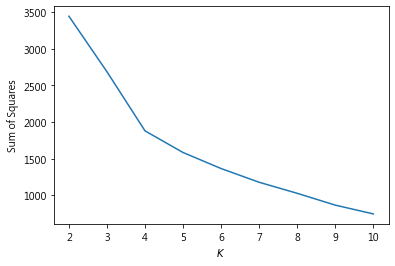

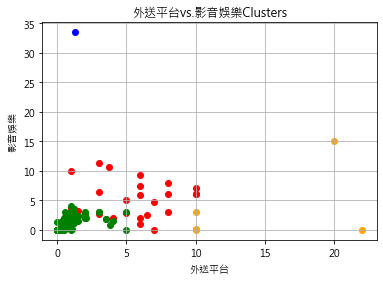

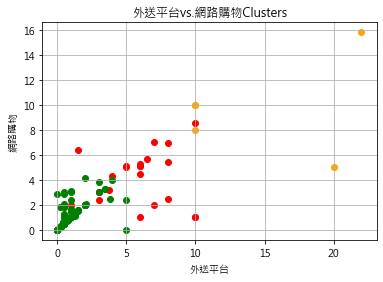

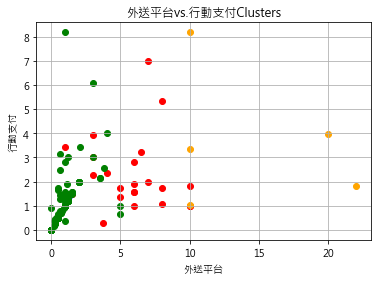

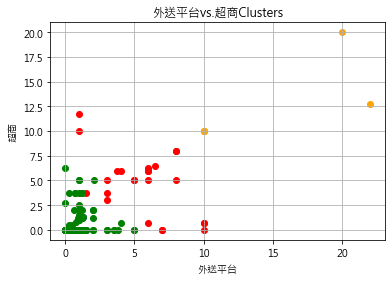

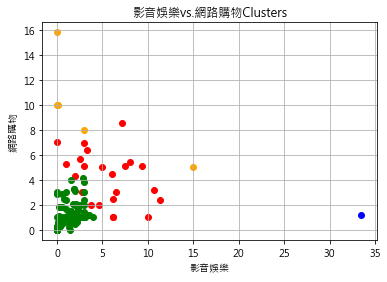

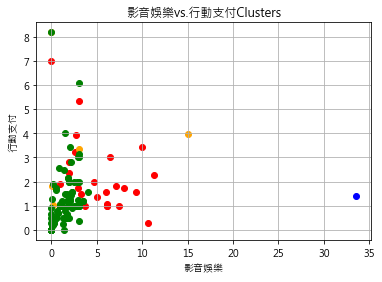

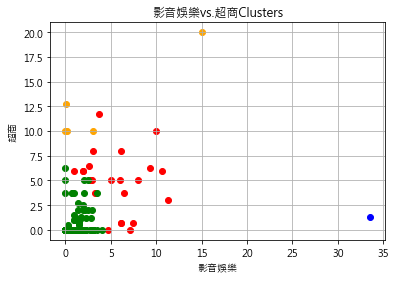

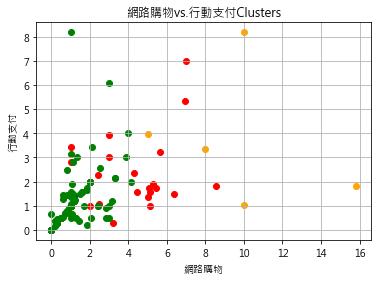

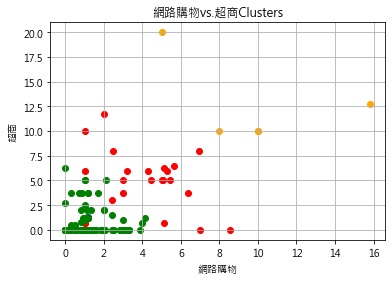

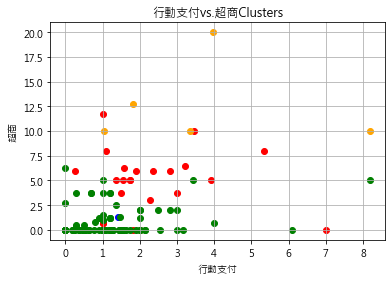

In [42]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
def PlotElbow(df):
    sse = []
    krange = list(range(2,11))
    X = df[['外送平台','影音娛樂','網路購物','行動支付','超商']].values
    for n in krange:
        model = cluster.KMeans(n_clusters=n, random_state=3)
        model.fit_predict(X)
        cluster_assignments = model.labels_
        centers = model.cluster_centers_
        sse.append(np.sum((X - centers[cluster_assignments]) ** 2))
        #sse.append(model.inertia_)

    plt.plot(krange, sse)
    plt.xlabel("$K$")
    plt.ylabel("Sum of Squares")
    plt.savefig('elbow.png')
    plt.show()

PlotElbow(df)

def PlotCluster(cluster_df, column_names):
    for i in column_names[0:len(column_names)-1]:
        for j in column_names[(column_names.index(i)+1):len(column_names)]:
            plt.scatter(
                cluster_df.loc[cluster_df['Cluster'] == 0][i], 
                cluster_df.loc[cluster_df['Cluster'] == 0][j],
                c='red')
            plt.scatter(
                cluster_df.loc[cluster_df['Cluster'] == 1][i], 
                cluster_df.loc[cluster_df['Cluster'] == 1][j],
                c='blue')
            plt.scatter(
                cluster_df.loc[cluster_df['Cluster'] == 2][i], 
                cluster_df.loc[cluster_df['Cluster'] == 2][j],
                c='orange')
            plt.scatter(
                cluster_df.loc[cluster_df['Cluster'] == 3][i], 
                cluster_df.loc[cluster_df['Cluster'] == 3][j],
                c='green')
            plt.title(i +'vs.'+ j +'Clusters')
            plt.xlabel(i)
            plt.ylabel(j)
            plt.grid()
            plt.savefig(f'{i}vs.{j}plot.png')
            plt.show()
column_names = ['外送平台','影音娛樂','網路購物','行動支付','超商']
PlotCluster(df, column_names=column_names)
